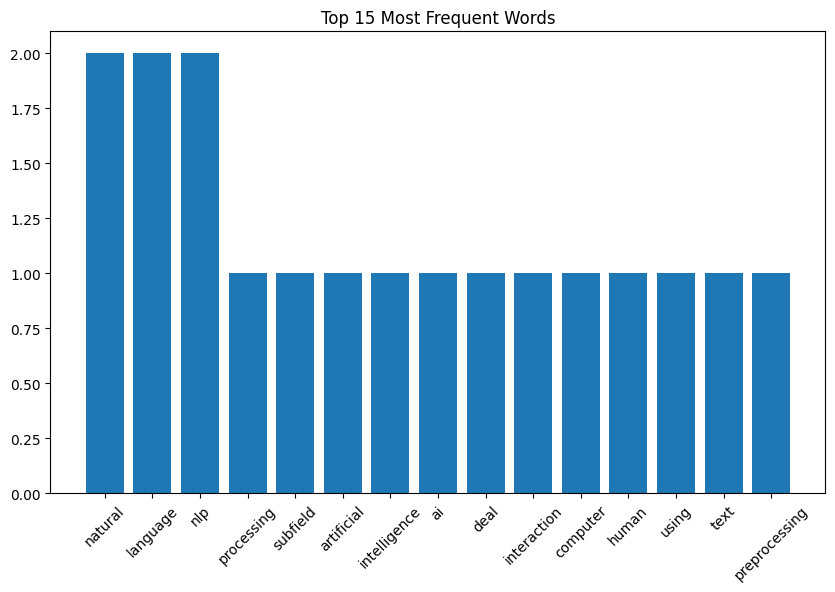

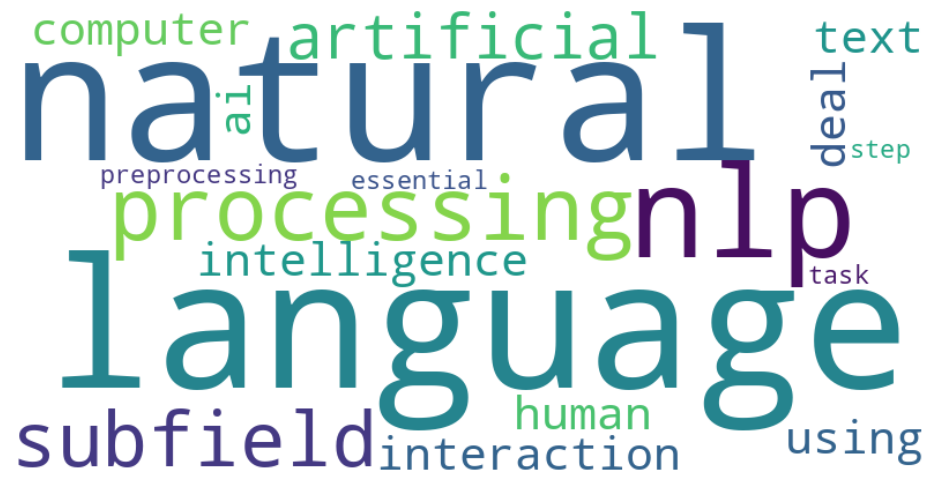

,Word,Count
0,natural,2
1,language,2
2,nlp,2
3,processing,1
4,subfield,1


In [10]:
# ==========================================================
# 1. Install Required Libraries
# ==========================================================
!pip install nltk wordcloud matplotlib pandas

import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download safe NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# ==========================================================
# 2. Colab-Safe Text Preprocessing Function
# ==========================================================
def preprocess_text_safe(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize using regex (safe in Colab)
    tokens = re.findall(r'\b[a-z]+\b', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return tokens

# ==========================================================
# 3. Word Frequency Analyzer
# ==========================================================
def word_frequency(tokens):
    return Counter(tokens)

# ==========================================================
# 4. Visualization Functions
# ==========================================================
def plot_bar_chart(freq_dist, top_n=20):
    common_words = freq_dist.most_common(top_n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,6))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top {top_n} Most Frequent Words")
    plt.show()

def generate_wordcloud(freq_dist):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# ==========================================================
# 5. Reusable Pipeline Function
# ==========================================================
def analyze_text(text, top_n=20, save_prefix="output"):
    # Preprocess
    tokens = preprocess_text_safe(text)

    # Frequency Analysis
    freq_dist = word_frequency(tokens)

    # Save Frequency Table
    df = pd.DataFrame(freq_dist.most_common(), columns=['Word','Count'])
    df.to_csv(f"{save_prefix}_frequency.csv", index=False)

    # Visualizations
    plot_bar_chart(freq_dist, top_n)
    generate_wordcloud(freq_dist)

    return df

# ==========================================================
# 6. Example Run
# ==========================================================
sample_text = """
Natural Language Processing (NLP) is a subfield of artificial intelligence (AI)
that deals with the interaction between computers and humans using natural language.
Text preprocessing is an essential step in NLP tasks.
"""

results = analyze_text(sample_text, top_n=15, save_prefix="sample")
results.head()
